# **Collecting Data**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Importing the dataset
#Features yang digunakan adalah kolom 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'
filecsv = "kc_house_data.csv"
df = pd.read_csv(filecsv, usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])

# **EDA**

In [3]:
# Exploratory Data Analysis (EDA)
# Melihat 5 baris teratas dari data
# Variabel X adalah bedrooms, bathrooms, sqft_living, grade, price, yr_built
# Variabel y adalah price
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [4]:
  df = df.rename(columns={"price": "harga", "bedrooms": "kamar tidur", "bathrooms":"kamar mandi",
                          "sqft_living": "luas rumah", "grade": "grade", "yr_built": "tahun pembangunan"})
  df.head()

,harga,kamar tidur,kamar mandi,luas rumah,grade,tahun pembangunan
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [5]:
# Untuk mengetahui jumlah kolom dan baris dari data
# Data kita mempunyai 6 kolom (features) dengan 21613 baris
df.shape

(21613, 6)

In [6]:
# Melihat informasi data. Dapat dilihat bahwa seluruh data sudah dalam bentuk numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   harga              21613 non-null  float64
 1   kamar tidur        21613 non-null  int64  
 2   kamar mandi        21613 non-null  float64
 3   luas rumah         21613 non-null  int64  
 4   grade              21613 non-null  int64  
 5   tahun pembangunan  21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [7]:
# Disini dapat dilihat pada data jumlah 'kamar mandi' masih ada angka pecahan,
# sehingga kita harus mengubah tipe data tersebut dari float menjadi int

# pada data jumlah 'kamar tidur' maksimalnya ada 33 kamar. untuk 1 rumah pribadi, 33 kamar mungkin
# jumlahnya terlalu banyak . Sehingga nanti kita akan merubahnya menjadi 3 kamar
df.describe()

,harga,kamar tidur,kamar mandi,luas rumah,grade,tahun pembangunan
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.673622e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [9]:
# Merubah tipe data dari 'kamar mandi' menjadi int
df['kamar mandi'] = df['kamar mandi'].astype('int')

In [10]:
# Mengganti nilai 33 pada data kamar tidur menjadi 3
df['kamar tidur'] = df['kamar tidur'].replace(33,3)

In [11]:
# Mencari dan menangani missing values
# Ternyata data tersebut tidak ada missing values (data yg kosong)

df.isnull().sum()

harga                0
kamar tidur          0
kamar mandi          0
luas rumah           0
grade                0
tahun pembangunan    0
dtype: int64

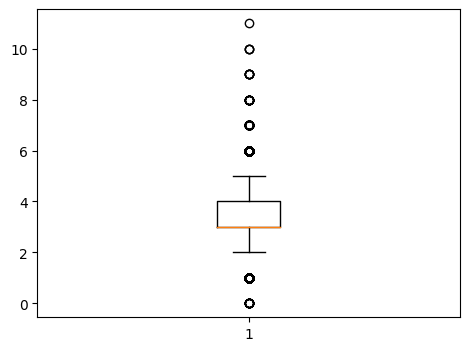

In [12]:
# Univariate analysis kamar tidur
# Melihat distribusi dari kamar tidur
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,2)
plt.boxplot(df['kamar tidur'])
plt.show()

# Dapat dilihat bahwa sebagian besar jumlah kamar tidur itu di angka 3 dan 4
# Data memiliki banyak outlier (data yg menyimpang dari rata-rata sekumpulan data yang ada)

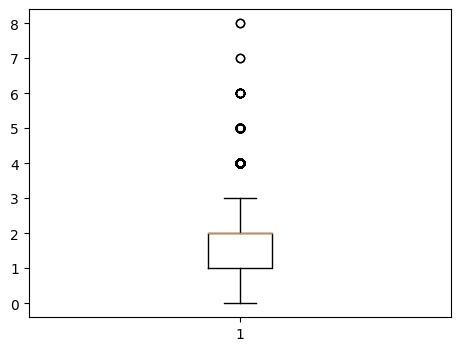

In [13]:
# Univariate analysis kamar mandi
# Melihat distribusi dari kamar mandi
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,2)
plt.boxplot(df['kamar mandi'])
plt.show()

# Jumlah kamar mandi paling banyak berada pada angka 1 dan 2
# Nilai outlier juga lumayan banyak

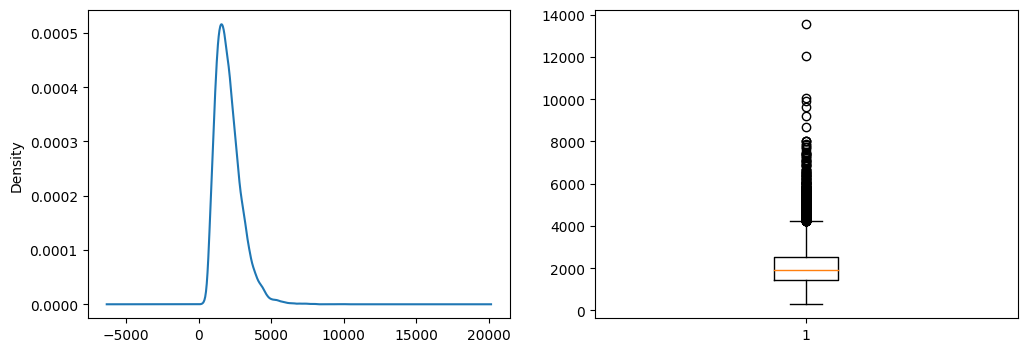

In [14]:
# Univariate analysis luas rumah
# Melihat distribusi dari luas rumah
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['luas rumah'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['luas rumah'])
plt.show()

# Density dari distribusi luas rumah berada di sekitar angka 2000an
# banyak terdapat outliers

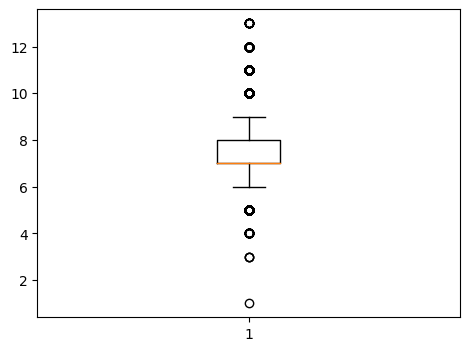

In [15]:
# Univariate analysis grade
# Melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

# Sebagian besar rumah memiliki grade 7 dan 8
# Dilihat dari boxplot, data meimiliki beberapa outliers

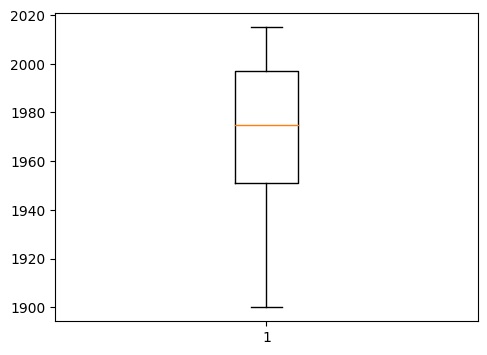

In [16]:
# Univariate analysis tahun pembangunan
# Melihat distribusi dari tahun pembangunan
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,2)
plt.boxplot(df['tahun pembangunan'])
plt.show()

# Density terdapat di sekitar tahun 1980an
# Data tidak memiliki outliers

<Figure size 1000x800 with 0 Axes>

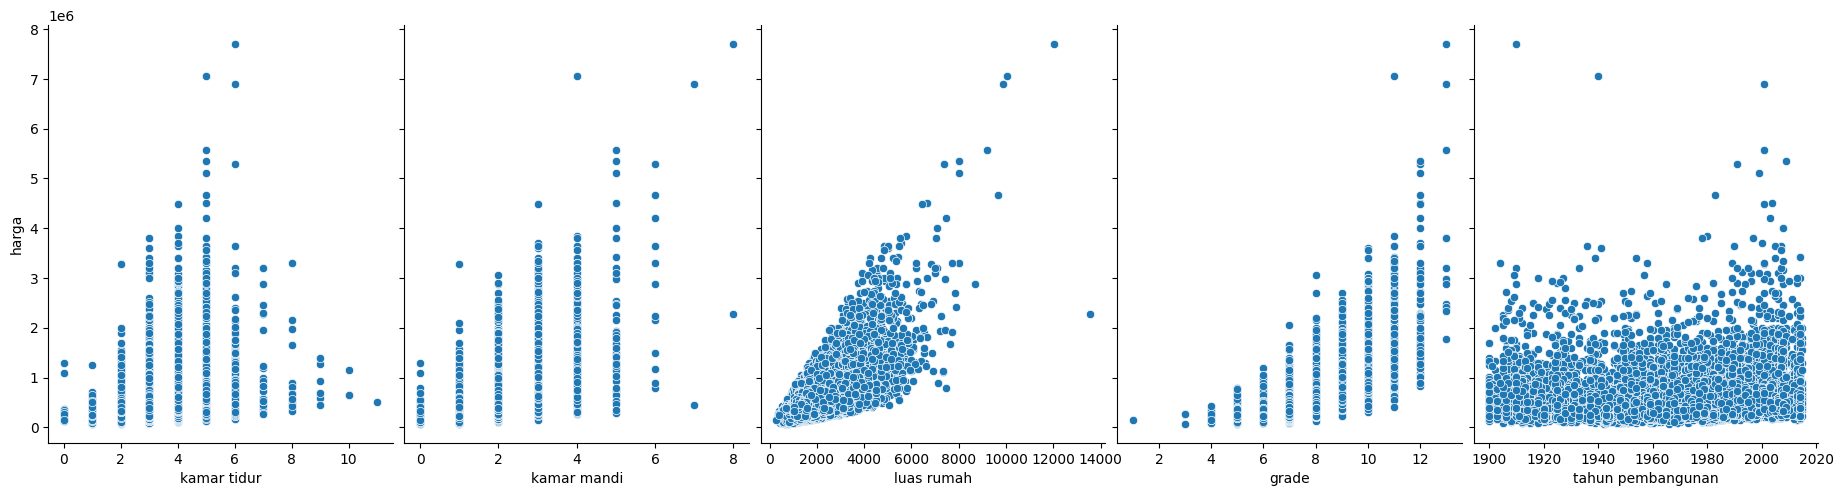

In [17]:
# Melihat hubungan antara independent variable dan dependent variable
# Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['kamar tidur', 'kamar mandi', 'luas rumah', 'grade', 'tahun pembangunan'],
                      y_vars=['harga'], height=5, aspect=0.75)
plt.show()

In [18]:
# Mengetahui nilai korelasi dari independent variable dan dependent variable
# Dari tabel dibawah dapat dilihat bahwa luas rumah mempunyai hubungan linear positif yang sangat kuat dengan harga jika dibandingkan dengan yang lain
# Nilai korelasi tahun pembangunan hampir mendekati 0 yang menandakan bahwa usia rumah tidak mempengaruhi pada harga rumah
df.corr().style.background_gradient().set_precision(2)

<ipython-input-18-572b7dc0cd21>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,harga,kamar tidur,kamar mandi,luas rumah,grade,tahun pembangunan
harga,1.00,0.32,0.51,0.70,0.67,0.05
kamar tidur,0.32,1.00,0.48,0.59,0.37,0.16
kamar mandi,0.51,0.48,1.00,0.70,0.61,0.43
luas rumah,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
tahun pembangunan,0.05,0.16,0.43,0.32,0.45,1.00


# **PreProcessing**

In [19]:
 # Pertama, buat variabel x dan y
 X = df.drop(columns='harga')
 y = df['harga']

In [20]:
# Kedua, kita split data kita menjadi data training dan data testing dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [21]:
# Cek shape dari data training dan testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


# **Implementation Method**

In [22]:
# ketiga, kita bikin object linear regresi
# keempat, train the model menggunakan training data yang suda di split
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
# Kelima, cari tahu nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53107.6472896   64717.46155191    189.01657706 131403.03815461
  -3972.97986172]
7037378.853676203


In [24]:
# Agar lebih rapi, kita coba buat kedalam dataframe untuk menampilkan slope/koefisien dari data tersebut
coef_dict = {
    'features': X.columns,
    'coef_value': lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns = ['features', 'coef_value'])
coef

,features,coef_value
0,kamar tidur,-53107.647290
1,kamar mandi,64717.461552
2,luas rumah,189.016577
3,grade,131403.038155
4,tahun pembangunan,-3972.979862


In [25]:
# Dari nilai m dan b diatas, kalau dimasukkan ke dalam rumus menjadi Y = -53107.65x1 + 64717.46x2 + 189.01x3 + 131403.03x4 + -3972.97x5 + 7037378

In [26]:
# Melakukan prediksi pada data uji
y_pred = lin_reg.predict(X_test)

In [27]:
# Keenam, kita cari tahu skor akurasi dari model kita menggunakan testing data yang sudah di split
lin_reg.score(X_test, y_test)

# model kita mendapatkan skor akurasi sebesar 61%

0.6124696855770888

In [28]:
# PREDICTION

# Kita coba prediksi harga rumah dengan permintaan kriteria sebagai berikut :
# kamar tidur = 3
# kamar mandi = 2
# luas rumah = 1800
# grade = 7
# tahun pembangunan = 1990

In [29]:
# Prediksi harga rumah
lin_reg.predict ([[3,2,1800,7,1990]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([361312.01589142])

In [ ]:
# Hasil prediksi harga rumah adalah sekitar 361.312 US$

# **Evaluation**

In [30]:
# Memeriksa keakuratan model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Menghitung RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 145501.28
Mean Squared Error (MSE): 50186528666.43
Root Mean Squared Error (RMSE): 224023.50


In [42]:
# MAE = 145.501
# MSE = 50.186.528.666
# RMSE = 224.023